# AccuWeather Data Analysis

Welcome to the AccuWeather Data Analysis project. Remember to run the cells in order to avoid any errors.

### Install necessary packages (Optional)

If the required packages are not yet installed in the environment, you can run the following command to install the necessary packages.

In [164]:
# uncomment the line below to install the required packages
# !pip install -r requirements.txt

### Import the following modules

The following modules will be used to complete the task of the project.

In [148]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from windrose import WindroseAxes

Open the given URL

Note: A website will open after you execute the code below. You can ignore it and proceed with the next steps.

In [91]:
driver = webdriver.Chrome()
url = 'https://www.accuweather.com/en/ph/baguio-city/1-262309_1_al/daily-weather-forecast/1-262309_1_al'

driver.get(url)

### Data Scraping from AccuWeather

Using Selenium, we will scrape the data from the AccuWeather website. Before proceeding, we first inspect the website to check the necessary elements to be able to locate the data we need.

![img/urlElements.png](img/urlElements.png)

By inspecting one of the cards in the website, we determine that the following class names are to be used to locate and complete the data that we need.

In [92]:
date_raw = driver.find_elements(By.CLASS_NAME, 'date') # extract the dates
temp_raw = driver.find_elements(By.CLASS_NAME, 'temp') # extract the temperature
precip_raw = driver.find_elements(By.CLASS_NAME, 'precip') # extract the precipitation probability 
condition_raw = driver.find_elements(By.CLASS_NAME, 'phrase') # extract the weather condition
realFeel_raw = driver.find_elements(By.CLASS_NAME, 'left') # extract the real feel temperature
uvIndAndWind_raw = driver.find_elements(By.CLASS_NAME, 'right') # extract the max UV index and wind

Next, we check the structure of the scraped data to determine the necessary steps to clean the data.

In [96]:
raw_data = []
for i in range(len(temp_raw)):
    raw_data.append({
        'date_raw': date_raw[i].text,
        'temp_raw': temp_raw[i].text,
        'precip_raw': precip_raw[i].text,
        'condition_raw': condition_raw[i].text,
        'realFeel_raw': realFeel_raw[i].text,
        'uvIndAndWind_raw': uvIndAndWind_raw[i].text
    })

df_raw = pd.DataFrame(raw_data)
df_raw.head(15)

,date_raw,temp_raw,precip_raw,condition_raw,realFeel_raw,uvIndAndWind_raw
0,THU\n7/25,21° /19°,55%,Overcast with a thunderstorm in parts of the area,,
1,THU,23° /20°,95%,A thick cloud cover with a couple of showers a...,RealFeel®\n18°\nCloud Cover\n100%,Wind\nSSW 7 km/h\nWind Gusts\n22 km/h
2,7/25,24° /19°,92%,Considerable cloudiness and humid with a coupl...,RealFeel®\n28°\nRealFeel Shade™\n24°,Max UV Index\n6 High\nWind\nSSW 9 km/h
3,FRI\n7/26,22° /19°,98%,"Thunderstorms, some can be heavy late; cloudy",RealFeel®\n29°\nRealFeel Shade™\n24°,Max UV Index\n6 High\nWind\nS 9 km/h
4,FRI,21° /19°,96%,Cloudy with showers and thunderstorms,RealFeel®\n26°\nRealFeel Shade™\n23°,Max UV Index\n4 Moderate\nWind\nWNW 6 km/h
5,7/26,21° /19°,74%,Cloudy with a couple of showers and a thunders...,RealFeel®\n26°\nRealFeel Shade™\n22°,Max UV Index\n5 Moderate\nWind\nW 7 km/h
6,SAT\n7/27,22° /18°,75%,Remaining cloudy with a couple of showers and ...,RealFeel®\n24°\nRealFeel Shade™\n22°,Max UV Index\n3 Moderate\nWind\nW 7 km/h
7,SAT,23° /18°,68%,Mostly cloudy with showers and thunderstorms,RealFeel®\n26°\nRealFeel Shade™\n21°,Max UV Index\n6 High\nWind\nWSW 7 km/h
8,7/27,23° /18°,60%,Mostly cloudy with a couple of showers and a t...,RealFeel®\n28°\nRealFeel Shade™\n24°,Max UV Index\n7 High\nWind\nW 9 km/h
9,SUN\n7/28,22° /18°,60%,Times of sun and clouds with a couple of showe...,RealFeel®\n25°\nRealFeel Shade™\n24°,Max UV Index\n7 High\nWind\nNW 4 km/h


From this raw structure, we can use the following takeaways to help us clean the data:
1. The `date_raw` element of a card results in three outputs: the combined date and day, the date, and the day.
2. The `temp_raw` contains both the high and low temperatures (in Celsius).
3. The `phrase_raw` contains the condition.
4. The `realFeel_raw` provided by `class='left'` contains the real feel temperature and real feel shade temperature (in Celsius).
5. The `uvIndAndWind_raw` provided by `class='right'` contains the max UV index and wind speed (in km/h).
6. Both the `realFeel_raw` and `uvIndAndWind_raw` are shifted by one index from the `date_raw`, `temp_raw`, and `phrase_raw`.

With this information, we now proceed to creating more structured data.

In [ ]:
data = []
for i in range(len(temp_raw)):
    [day, dateMMDD] = date_raw[3*i].text.split('\n')
    [tempHigh, tempLow] = temp_raw[i].text.split(' /')
    [_, realFeelTemp, _, realFeelShade] = realFeel_raw[i+1].text.split('\n')
    [_, maxUV, _, wind] = uvIndAndWind_raw[i+1].text.split('\n')
    [windDirection, windSpeed] = wind.split(' ', 1)
    data.append({
        'day': day,
        'date': dateMMDD,
        'tempHigh': tempHigh,
        'tempLow': tempLow,
        'condition': condition_raw[i].text,
        'precip': precip_raw[i].text,
        'realFeel': realFeelTemp,
        'realFeelShade': realFeelShade,
        'maxUV': maxUV,
        'windDirection': windDirection,
        'windSpeed': windSpeed
    })

df = pd.DataFrame(data)

driver.quit()


In [98]:
df.head(15)

,day,date,tempHigh,tempLow,condition,precip,realFeel,realFeelShade,maxUV,windDirection,windSpeed
0,THU,7/25,21°,19°,Overcast with a thunderstorm in parts of the area,55%,18°,100%,SSW 7 km/h,22,km/h
1,FRI,7/26,23°,20°,A thick cloud cover with a couple of showers a...,95%,28°,24°,6 High,SSW,9 km/h
2,SAT,7/27,24°,19°,Considerable cloudiness and humid with a coupl...,92%,29°,24°,6 High,S,9 km/h
3,SUN,7/28,22°,19°,"Thunderstorms, some can be heavy late; cloudy",98%,26°,23°,4 Moderate,WNW,6 km/h
4,MON,7/29,21°,19°,Cloudy with showers and thunderstorms,96%,26°,22°,5 Moderate,W,7 km/h
5,TUE,7/30,21°,19°,Cloudy with a couple of showers and a thunders...,74%,24°,22°,3 Moderate,W,7 km/h
6,WED,7/31,22°,18°,Remaining cloudy with a couple of showers and ...,75%,26°,21°,6 High,WSW,7 km/h
7,THU,8/1,23°,18°,Mostly cloudy with showers and thunderstorms,68%,28°,24°,7 High,W,9 km/h
8,FRI,8/2,23°,18°,Mostly cloudy with a couple of showers and a t...,60%,25°,24°,7 High,NW,4 km/h
9,SAT,8/3,22°,18°,Times of sun and clouds with a couple of showe...,60%,27°,23°,9 Very High,NNW,4 km/h


Notice that the `realFeelShade`, `maxUV`, `windDirection`, and `windSpeed` data of the first row have different values than the rest of the rows. This is because AccuWeather provides other relevant information about the weather today, such as highlighted in the image below, which is not available for the rest of the days.

![img/otherInformation.png](img/otherInformation.png)

The modifications of relevant information only happen in the current date. In my case, I wrote this notebook on July 25, 2024. To address this and prevent from happening again, we will omit the first row before saving the CSV file.

In [99]:
df = df.drop(0)

In [100]:
df.head(5)

,day,date,tempHigh,tempLow,condition,precip,realFeel,realFeelShade,maxUV,windDirection,windSpeed
1,FRI,7/26,23°,20°,A thick cloud cover with a couple of showers a...,95%,28°,24°,6 High,SSW,9 km/h
2,SAT,7/27,24°,19°,Considerable cloudiness and humid with a coupl...,92%,29°,24°,6 High,S,9 km/h
3,SUN,7/28,22°,19°,"Thunderstorms, some can be heavy late; cloudy",98%,26°,23°,4 Moderate,WNW,6 km/h
4,MON,7/29,21°,19°,Cloudy with showers and thunderstorms,96%,26°,22°,5 Moderate,W,7 km/h
5,TUE,7/30,21°,19°,Cloudy with a couple of showers and a thunders...,74%,24°,22°,3 Moderate,W,7 km/h


We now see a more structured data. Save the data to a CSV file.

In [101]:
# save the data to a csv file
df.to_csv('weather_data.csv', index=False)

### Data Cleaning

For the analysis, we would want to use all the numerical data as much as possible. Thus, we convert the different columns to their respective data types.

In [158]:
# load the data from the csv file
weather_data = pd.read_csv('weather_data.csv')

weather_data.head(5)

,day,date,tempHigh,tempLow,condition,precip,realFeel,realFeelShade,maxUV,windDirection,windSpeed
0,FRI,7/26,23°,20°,A thick cloud cover with a couple of showers a...,95%,28°,24°,6 High,SSW,9 km/h
1,SAT,7/27,24°,19°,Considerable cloudiness and humid with a coupl...,92%,29°,24°,6 High,S,9 km/h
2,SUN,7/28,22°,19°,"Thunderstorms, some can be heavy late; cloudy",98%,26°,23°,4 Moderate,WNW,6 km/h
3,MON,7/29,21°,19°,Cloudy with showers and thunderstorms,96%,26°,22°,5 Moderate,W,7 km/h
4,TUE,7/30,21°,19°,Cloudy with a couple of showers and a thunders...,74%,24°,22°,3 Moderate,W,7 km/h


Looking into the data again, we can see which columns provide numerical values. We can extract these values and convert them to integers since they do not contain any decimal points.

In [159]:
# convert the date column to date format; here I added the year 2024 to the date because it is not included in the raw data
weather_data['date'] = pd.to_datetime(weather_data['date'] + '/2024').dt.strftime('%m/%d/%Y')

# remove the '°' from the columns containing temperature values and convert them to integers
weather_data['tempHigh'] = weather_data['tempHigh'].str.replace('°', '').astype(int)
weather_data['tempLow'] = weather_data['tempLow'].str.replace('°', '').astype(int)
weather_data['realFeel'] = weather_data['realFeel'].str.replace('°', '').astype(int)
weather_data['realFeelShade'] = weather_data['realFeelShade'].str.replace('°', '').astype(int)

# remove the '%' from the precip column and convert it to integers
weather_data['precip'] = weather_data['precip'].str.replace('%', '').astype(int)

# remove the strings from the maxUV and windSpeed columns and convert the numbers to integer format
weather_data['maxUV'] = weather_data['maxUV'].str.split(' ').str[0].astype(int)
weather_data['windSpeed'] = weather_data['windSpeed'].str.split(' ').str[0].astype(int)

# since the day, condition, and windDirection columns do not contain numerical values, we will drop them
weather_data = weather_data.drop(columns=['day', 'condition'])

Let us now check the cleaned data.

In [160]:
weather_data.head(5)

,date,tempHigh,tempLow,precip,realFeel,realFeelShade,maxUV,windDirection,windSpeed
0,07/26/2024,23,20,95,28,24,6,SSW,9
1,07/27/2024,24,19,92,29,24,6,S,9
2,07/28/2024,22,19,98,26,23,4,WNW,6
3,07/29/2024,21,19,96,26,22,5,W,7
4,07/30/2024,21,19,74,24,22,3,W,7


Since we are able to extract the numerical values from the columns, we can now save the cleaned data and proceed to analysis.

We did not omit the windDirection column because although it contains string values, the values are representation of directions which can be converted into numerical data (e.g. N = 0, NE = 45, E = 90, etc.) which can help us with the visualization later.

In [161]:
weather_data.to_csv('weather_data_clean.csv', index=False)

Before proceeding, here are the descriptions of the columns:
- date: The date of the weather forecast.
- tempHigh: The high temperature of the day in Celsius.
- tempLow: The low temperature of the day in Celsius.
- precip: The precipitation probability of the day in percentage.
- realFeel: How the temperature (in Celsius) actually feels like outside.
- realFeelShade: How the temperature (in Celsius) actually feels like outside in the shade.
- maxUV: The maximum UV index of the day.
- windDirection: The direction of the wind.
- windSpeed: The speed of the wind in km/h.

### Data Visualization

In this part, we will visualize the data to better understand the weather conditions using the given data.

#### Visualizing High and Low Temperature Trend

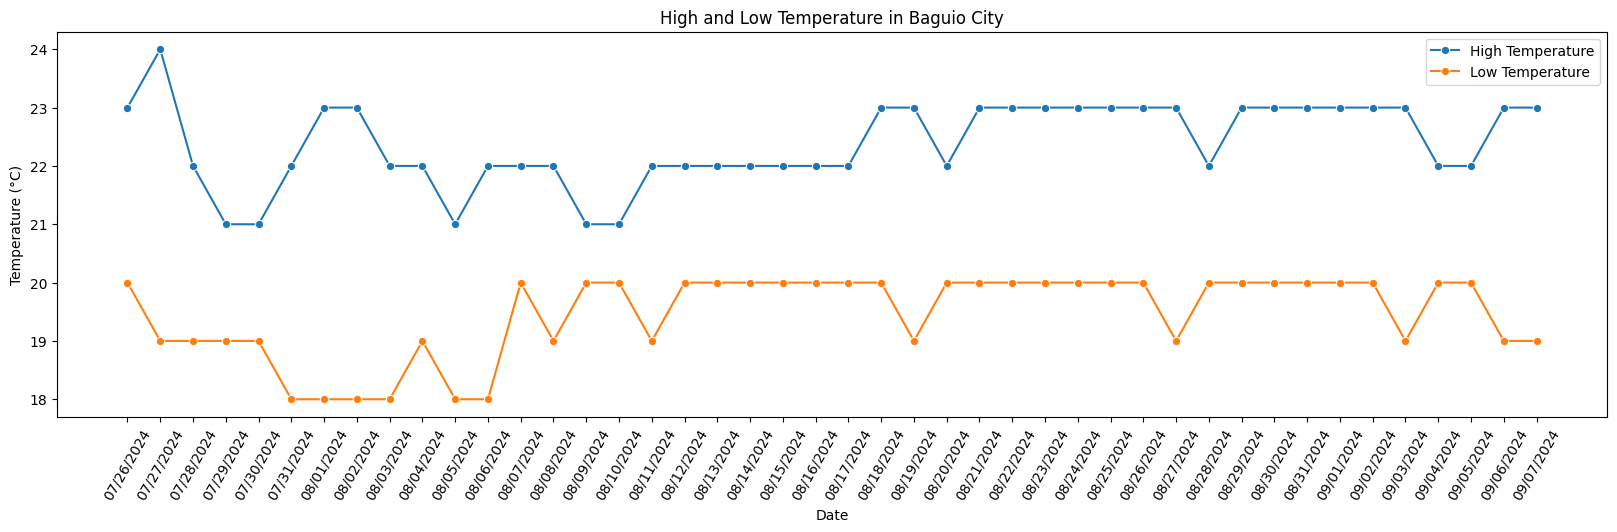

In [107]:
# write the graph configurations
plt.figure(figsize=(20, 5))
sns.lineplot(x='date', y='tempHigh', data=weather_data, label='High Temperature', marker='o') # plot the high temperature
sns.lineplot(x='date', y='tempLow', data=weather_data, label='Low Temperature', marker='o') # plot the low temperature
plt.title('High and Low Temperature in Baguio City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=60)
plt.legend() # display the legend

# display the graph
plt.show()

One of the important reasons why we do visualization is to see possible discrepancies and inconsistencies in the data easily. Here, we have the high and low temperature for each day. It would only make sense that the high temperature is greater than the low temperature. If case is otherwise, then we might have encountered an error during the data scraping process. 

By plotting the data, we are able to instantly verify that the data for high and low temperatures are consistent.

#### Visualizing the Precipitation Probability

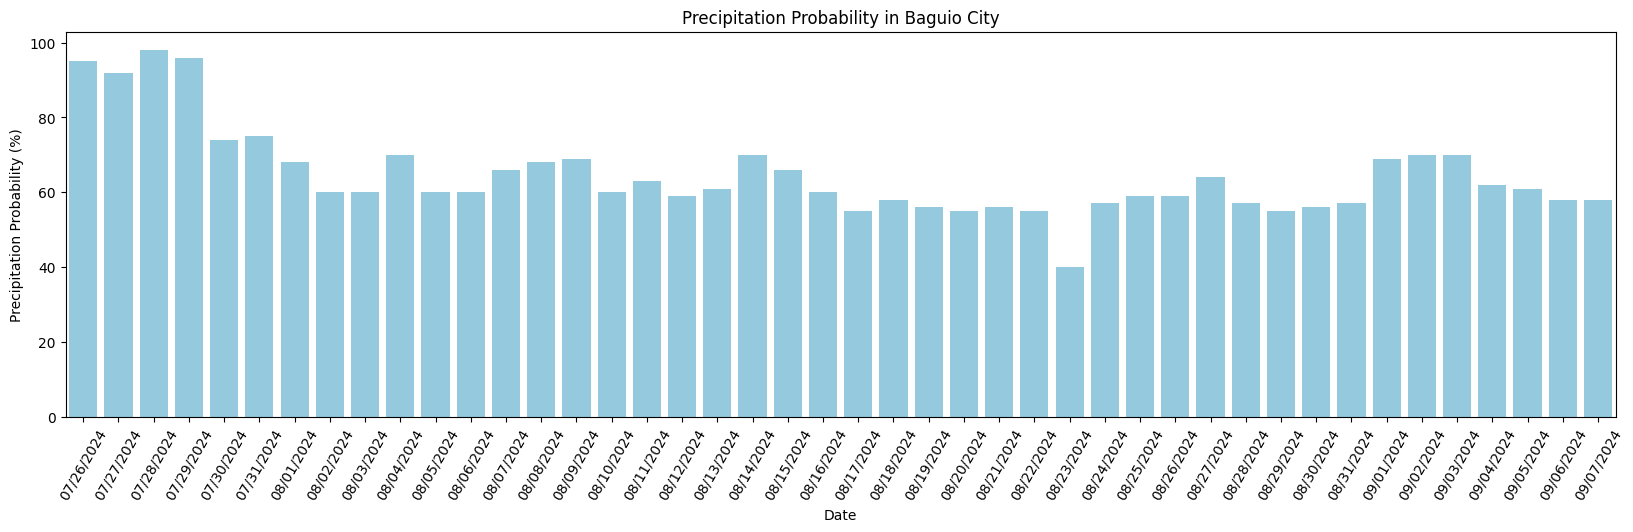

In [127]:
plt.figure(figsize=(20, 5))
sns.barplot(x='date', y='precip', data=weather_data, color='skyblue')
plt.title('Precipitation Probability in Baguio City')
plt.xlabel('Date')
plt.ylabel('Precipitation Probability (%)')
plt.xticks(rotation=60)

plt.show()


Another importance of data visualization is to help us compare and contrast our collected data to the actual weather conditions we see and experience in the real world. In the Philippines, the rainy season usually starts in June and ends in November. This is the time when we experience heavy rainfall and thunderstorms. Having a precipitation probability greater than 50% would mean that the data we have gathered follows the seasonal pattern in the Philippines.

#### Visualizing the Forecasted Real Feel Temperature and comparing to Forecasted Actual Temperature

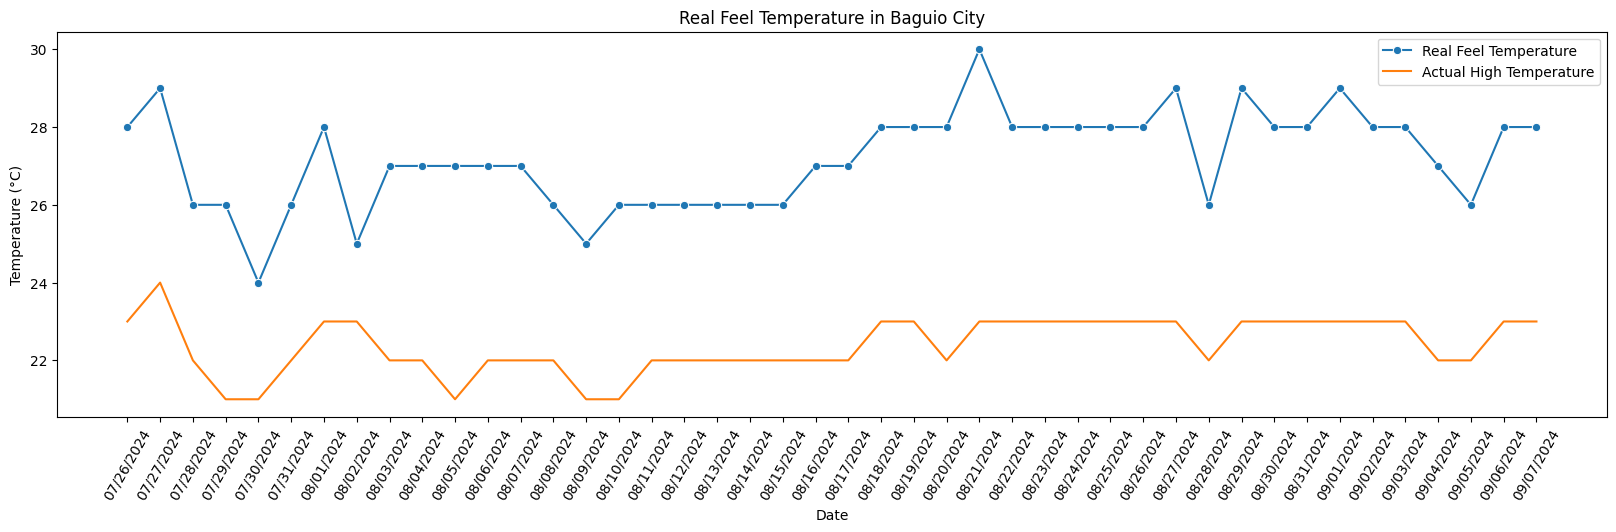

In [128]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='date', y='realFeel', data=weather_data, label='Real Feel Temperature', marker='o')
sns.lineplot(x='date', y='tempHigh', data=weather_data, label='Actual High Temperature')
plt.title('Real Feel Temperature in Baguio City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=60)
plt.legend()

plt.show()

With visualization, we can also have a prior inference of how might two columns of data correlate with each other. Before the actual computation, we gain initial idea of how strong the potential relationship between the two columns are. It reveals patterns, trends, etc. that might help us in our analysis.

Here, we compare patterns between the forecasted actual temperature and the forecasted real feel temperature. We can notice some similarities such that when there's an increase in the actual temperature, the real feel temperature also increases.

#### Visualizing the Wind Speed and Max UV Index Data

Before plotting the wind data, remember that we have not converted the wind direction yet to the corresponding degrees. Run the next cell first to map the column to its numerical representation.

In [162]:
directionMap = {'N': 0.00, 
    'NbE': 11.25,
    'NNE': 22.50,
    'NEbN': 33.75,
    'NE': 45.00,
    'NEbE': 56.25,
    'ENE': 67.50,
    'EbN': 78.75,
    'E': 90.00,
    'EbS': 101.25,
    'ESE': 112.50,
    'SEbE': 123.75,
	'SE': 135.00,
	'SEbS': 146.25,
	'SSE': 157.50,
	'SbE': 168.75,
	'S': 180.00,
	'SbW': 191.25,
	'SSW': 202.50,
	'SWbS': 213.75,
	'SW': 225.00,
	'SWbW': 236.25,
	'WSW': 247.50,
	'WbS': 258.75,
	'W': 270.00,
	'WbN': 281.25,
	'WNW': 292.50,
	'NWbW': 303.75,
	'NW': 315.00,
	'NWbN': 326.25,
	'NNW': 337.50,
	'NbW': 348.75
    }

# convert the wind direction to degrees
weather_data['windDirection'] = weather_data['windDirection'].map(directionMap)

Now that we have the numerical values, we can now give a better visualization of how wind speed and wind direction will behave in Baguio City in the next days.

<Figure size 300x300 with 0 Axes>

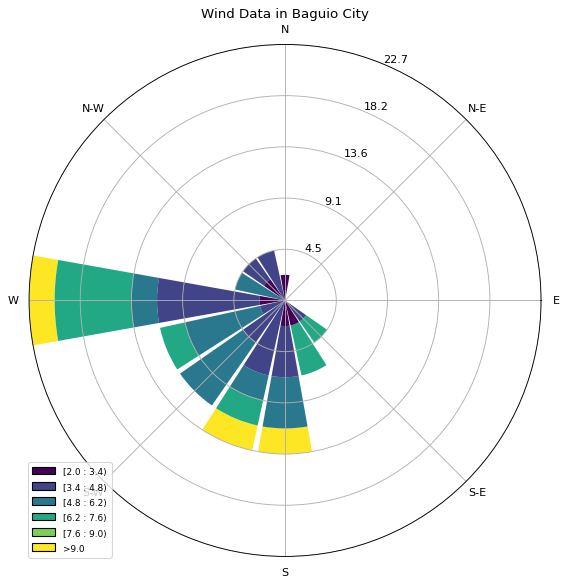

In [168]:
plt.figure(figsize=(3, 3))
ax = WindroseAxes.from_ax()
ax.bar(weather_data['windDirection'], weather_data['windSpeed'], normed=True, opening=0.9)
ax.set_legend()
plt.title('Wind Data in Baguio City')

plt.show()

Next, we plot the max UV index data using bar plot to see the different UV index levels in the next days.

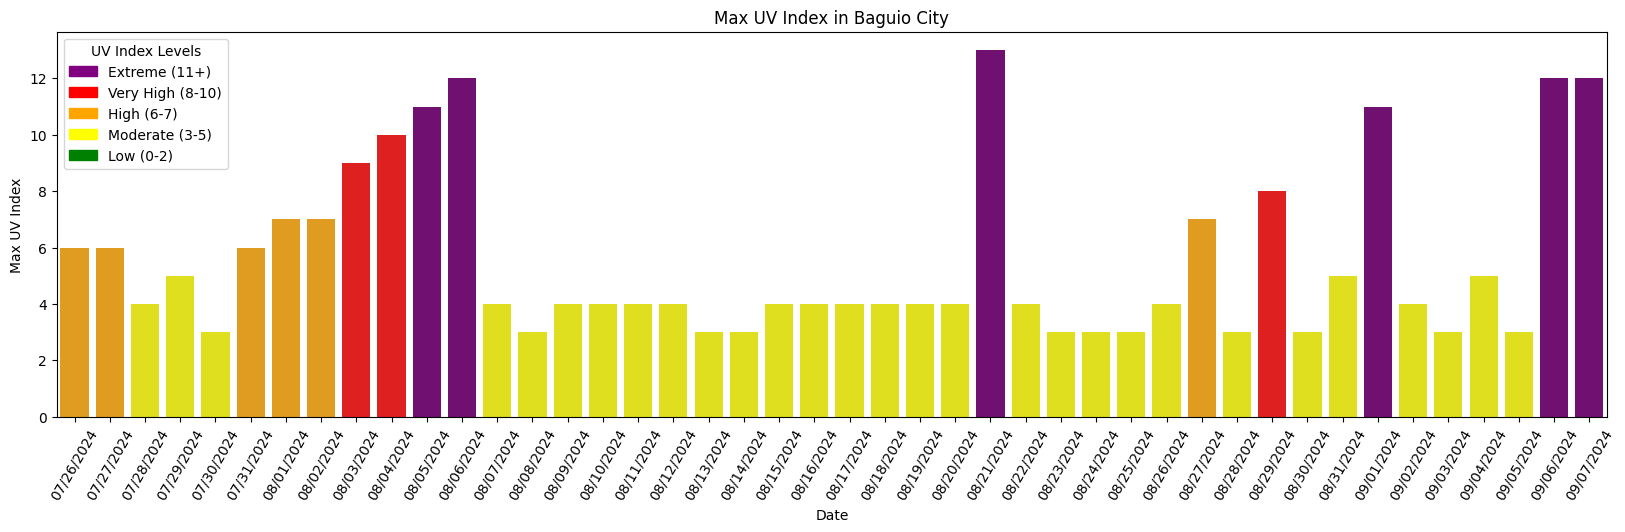

In [143]:
plt.figure(figsize=(20, 5))
sns.barplot(x='date', y='maxUV', data=weather_data, hue='date', label='Max UV Index', palette=['green' if x <= 2 else 'yellow' if x <= 5 else 'orange' if x <= 7 else 'red' if x <= 10 else 'purple' for x in weather_data['maxUV']])
plt.title('Max UV Index in Baguio City')
plt.xlabel('Date')
plt.ylabel('Max UV Index')
plt.xticks(rotation=60)

# create a legend for the UV index levels
legend_labels = ['Extreme (11+)', 'Very High (8-10)', 'High (6-7)', 'Moderate (3-5)', 'Low (0-2)']
legend_colors = ['purple', 'red', 'orange', 'yellow', 'green']
patches = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=patches, title="UV Index Levels")

plt.show()

The last benefit of using data visualization that will be tackled in this project is its capabiliy to improve our storytelling. It is difficult to imagine a tabulated wind speed and its direction. It will be difficult to comprehend the level of UV index if there are no colors to distinguish the levels.

We can use the visual graphs to communicate the behaviors, patterns, and insights with our audience more effectively than just showing them the raw or tabular data.

### Feature Analysis

In this part, we will try to understand the weather pattern by analyzing the features of the data to determine the potential relationships between the different columns.

#### Correlation Analysis

The next cell runs the correlation matrix that shows the relationship between two different columns. Since the windDirection column only provides the direction of the wind vector, we omitted it in the correlation analysis.

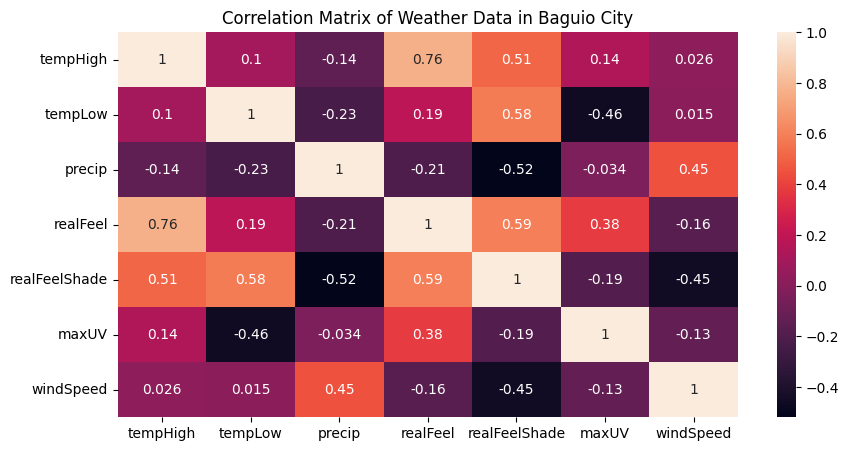

In [170]:
corr_matrix = weather_data.drop(columns=['date', 'windDirection']).corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix of Weather Data in Baguio City')
plt.show()

Using the results of the correlation matrix and prior knowledge about weather information, here are some insights that can be derived from the data:

- The high temperature has a strong positive correlation with real feel temperature. This is because AccuWeather's RealFeel Temperature is an equation that takes into account many different factors including the actual temperature.

- The precipitation probability has a negative correlation with the temperature. When it is expected to rain (high probability), it is also usually expected that the heat will dissipate, thus decreasing the temperature.

- There is a moderate positive correlation between wind speed and precipitation probability. During rainy season in the Philippines, rains are usually accompanied by strong winds.

- Both the high temperature and real feel temperature have a positive correlation with the UV index. A high UV index means that the sun's rays are more intense, and intense sun rays usually result in higher temperatures.

- The wind speed returns almost no correlation with the forecasted actual temperature. However, negative correlation is observed with the real feel temperatures. The strength of wind has effect on our skin which can potentially affect how we perceive the temperature.

Note that correlation simply measures the strength of a relationship between two variables. It cannot determine if there is a cause-and-effect relationship between the variables. It is also important to note that correlation is specific to the studied data and may have its limitations when generalizing conclusions. It is always best to do further analysis and provide contexts to give a more accurate interpretation of the data.

#### Feature Importance

In [181]:
X = weather_data.drop(columns=['tempHigh', 'date', 'windDirection'])
y = weather_data['tempHigh']
modelRFR = RandomForestRegressor()
modelRFR.fit(X, y)
feature_importances_RFR = modelRFR.feature_importances_
features = X.columns

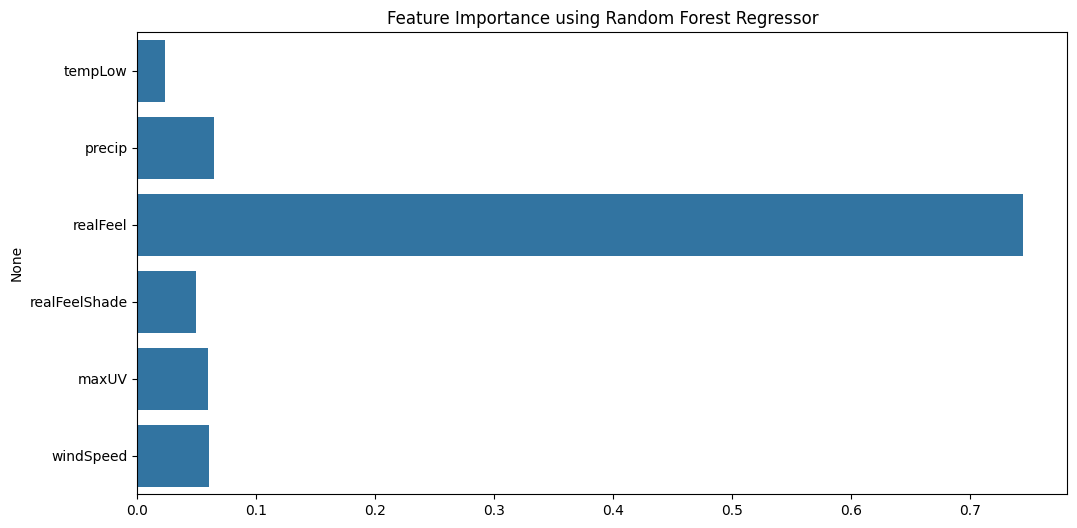

In [182]:
# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances_RFR, y=features)
plt.title('Feature Importance using Random Forest Regressor')
plt.show()

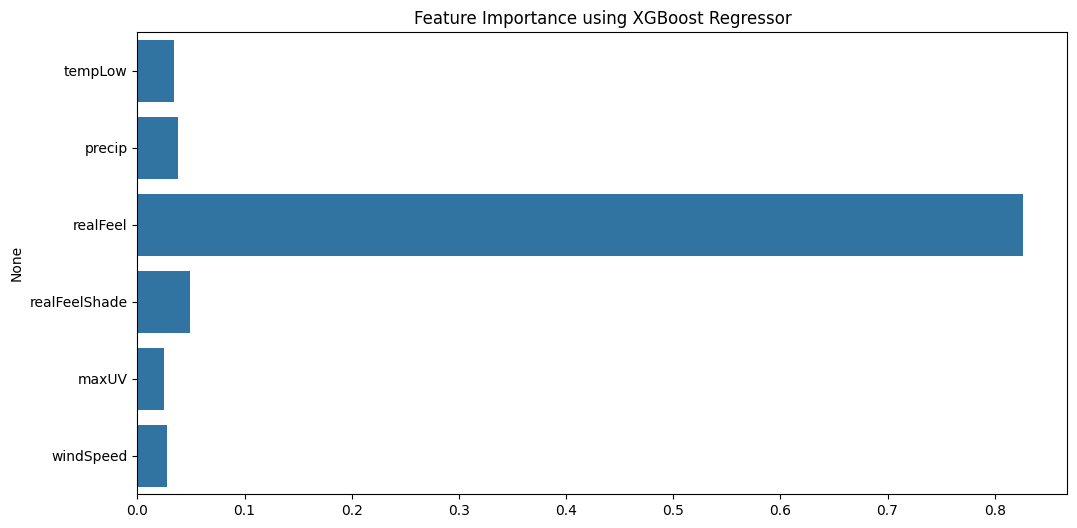

In [183]:
modelXGB = XGBRegressor()
modelXGB.fit(X, y)
feature_importances_XGB = modelXGB.feature_importances_

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances_XGB, y=features)
plt.title('Feature Importance using XGBoost Regressor')
plt.show()